# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

In [1]:
# Start coding from here
from __future__ import print_function, division
from nnet import activation, context, loss, model, optimizer
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets

## Downloading MNIST Dataset

In [2]:
mnist_trainset = datasets.MNIST(root="./data",
                                download=True,
                                train=True,
                                transform=transforms.Compose(
                                    [transforms.RandomCrop((20,20)),
                                     transforms.RandomHorizontalFlip(0.3),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]))

Processing...
Done!


In [3]:
mnist_testset = datasets.MNIST(root="./data",
                               download=True,
                               train=False,
                               transform=transforms.Compose(
                                    [transforms.RandomCrop((20,20)),
                                     transforms.RandomHorizontalFlip(0.3),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]))

## Displaying data

In [4]:
def plot_image_grid(images, rows, cols):
    """
    Plots a grid of images given as list
    Arguments:
        images (list) - images to plot as list
        rows (int) - grid rows
        cols (int) - grid columns
    """
    assert len(images) == rows*cols, "Number of images and grids don't match?"
    assert rows <= cols, "Rows should be lesser than columns. Try swapping?"
    fig, axes = plt.subplots(rows,cols,figsize=(10,10))
    for i in range(rows):
        for j in range(cols):
            axes[i,j].imshow(images[rows*i+j])

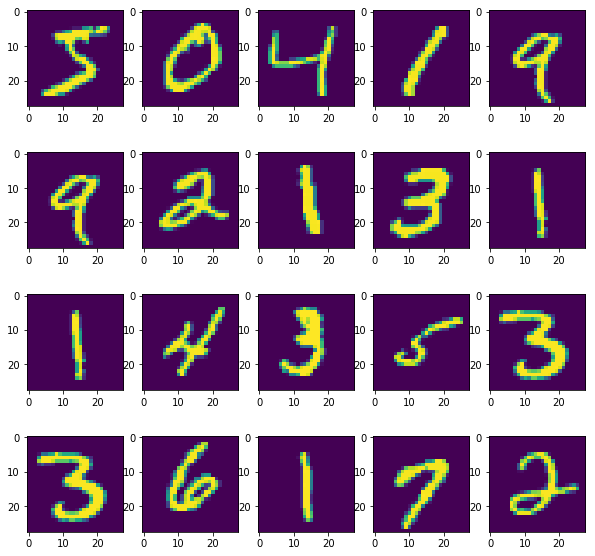

In [5]:
plot_image_grid(mnist_trainset.train_data[0:20],4,5)

## Transforms and Visualization

In [6]:
train_loader = DataLoader(mnist_trainset, batch_size=32, shuffle=True, num_workers=2)

In [7]:
test_loader = DataLoader(mnist_testset, batch_size=32, shuffle=True, num_workers=2)